# NBA: Winning in the Playoffs

***Authors:***
<br>
Beckett Newton, NYU Data Science, Fall 2024
<br>


***Data Collection***
<br>
This project will use a publically sourced data set from Kaggle in the form of a CSV containing NBA playoff statistics from 2000 to 2023. It contains variables such as defensive rating, offensive rating, pace, free throw rate, three point attempt rate, true shooting percentage, turnover percentage, offensive rebound percentage, defensive rebound percentage, etc., which are the primary advanced metrics beyond counting statistics that provide us further insight to team performance. 

***Data Preprocessing*** 
<br>
I will remove columns with NA values, rows with duplicate headers, and the data for the 2023 NBA playoffs since that data was not updated to show the full 2023 playoffs. I also removed the Rk, PL, and PW columns since they are not relevant to my analysis. 


In [20]:
import pandas as pd
file_path = 'WL_playoff_total.csv'
data = pd.read_csv(file_path)
data = data[(data['Team'] != 'Tm') & (data['Team'] != 'League Average')]
data = data[data['Year'] != 2023]
columns_to_drop = ['Unnamed: 0', 'Rk', 'Unnamed: 16', 'Unnamed: 21', 'PW', 'PL']
data = data.drop(columns=columns_to_drop, errors='ignore')
data.head(5)

,Team,Age,W,L,WL_percent,OPtg,DRtg,NRtg,Pace,FTr,...,TS_percent,eFG_percent_offense,TOV_percent_offense,ORB_percent,FT/FGA_offense,eFG_percent_defense,TOV_percent_defense,DRB_percent,FT/FGA_defense,Year
0,Portland Trail Blazers,30.0,10,6,0.625,107.7,102.2,5.5,85.9,0.386,...,0.541,0.481,12.9,25.9,0.303,0.478,13.4,75.0,0.248,2000
1,Miami Heat,29.6,6,4,0.600,97.4,94.4,3.0,84.6,0.328,...,0.493,0.451,14.1,25.7,0.227,0.431,13.5,80.8,0.269,2000
2,Indiana Pacers,30.9,13,10,0.565,109.7,106.8,2.9,89.0,0.322,...,0.545,0.488,11.4,25.1,0.267,0.481,11.2,73.0,0.220,2000
3,Los Angeles Lakers,29.3,15,8,0.652,110.1,107.5,2.6,90.3,0.393,...,0.529,0.498,11.4,30.6,0.245,0.476,12.1,73.7,0.289,2000
4,Milwaukee Bucks,27.6,2,3,0.400,107.5,105.5,2.0,89.3,0.266,...,0.520,0.479,11.3,28.5,0.203,0.446,11.0,70.4,0.262,2000


***Descriptive Statistics***
<br>
Lets take a look at the descriptive statistics to better understand the data and to create a baseline for interpretation:

In [7]:
numerical_columns = ['NRtg', 'OPtg', 'TS_percent', '3PAr',
    'DRB_percent', 'FT/FGA_offense', 'FTr',
    'ORB_percent', 'Pace', 'TOV_percent_offense', 'FT/FGA_defense',
    'eFG_percent_defense', 'DRtg']
for col in numerical_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')
descriptive_stats = data[numerical_columns].describe()
descriptive_stats

,NRtg,OPtg,TS_percent,3PAr,DRB_percent,FT/FGA_offense,FTr,ORB_percent,Pace,TOV_percent_offense,FT/FGA_defense,eFG_percent_defense,DRtg
count,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000,368.000000
mean,-2.843478,105.536957,0.530609,0.269429,74.448913,0.234712,0.310361,25.110326,91.568478,12.994565,0.241543,0.499595,108.380435
std,6.857285,6.303175,0.032519,0.087085,4.240167,0.042296,0.056359,4.382881,4.602024,1.750974,0.043524,0.035537,6.181175
min,-27.000000,87.500000,0.443000,0.087000,62.000000,0.124000,0.160000,13.500000,82.400000,8.100000,0.146000,0.419000,91.400000
25%,-7.200000,101.900000,0.507750,0.207000,71.675000,0.205500,0.270000,22.075000,87.900000,11.900000,0.210750,0.473000,103.900000
50%,-1.650000,105.500000,0.529000,0.254000,74.650000,0.231000,0.305500,24.900000,91.000000,12.850000,0.237000,0.497500,107.950000
75%,2.000000,110.125000,0.551250,0.328500,77.200000,0.266000,0.345250,28.150000,94.625000,14.125000,0.268000,0.522250,112.225000
max,13.700000,122.200000,0.616000,0.545000,85.700000,0.359000,0.469000,36.700000,104.400000,19.300000,0.363000,0.608000,128.700000


***Exploratory Data Analysis (EDA)***
<br>
Lets create visualizations to explore relationships and distributions in order to ensure that the data makes sense and is ready for continued exploration:

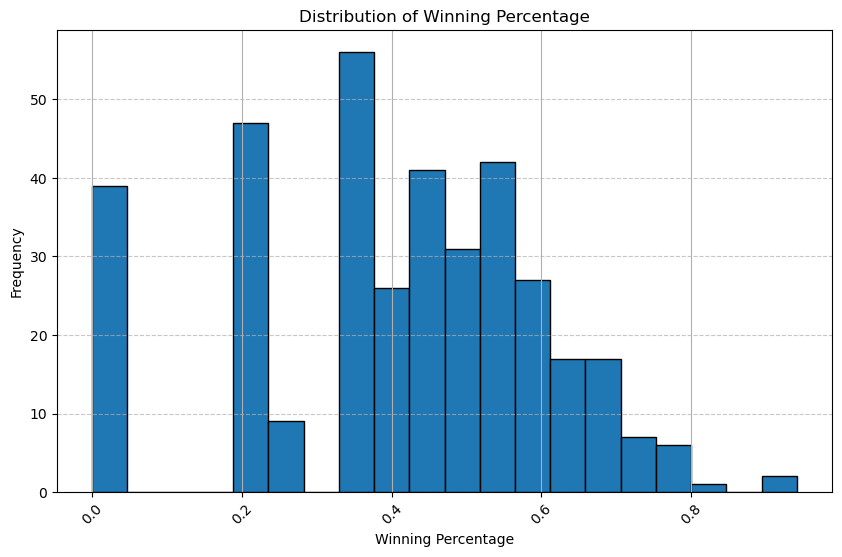

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
data["WL_percent"] = pd.to_numeric(data["WL_percent"], errors="coerce")
data_cleaned = data["WL_percent"].dropna()
plt.figure(figsize=(10, 6))
data_cleaned.hist(bins=20, edgecolor="k")
plt.title("Distribution of Winning Percentage")
plt.xlabel("Winning Percentage")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
if data_cleaned.dtype in ["float64", "int64"]:
    plt.locator_params(axis="x", nbins=10)
plt.grid(axis='y', linestyle="--", alpha=0.7)
plt.show()

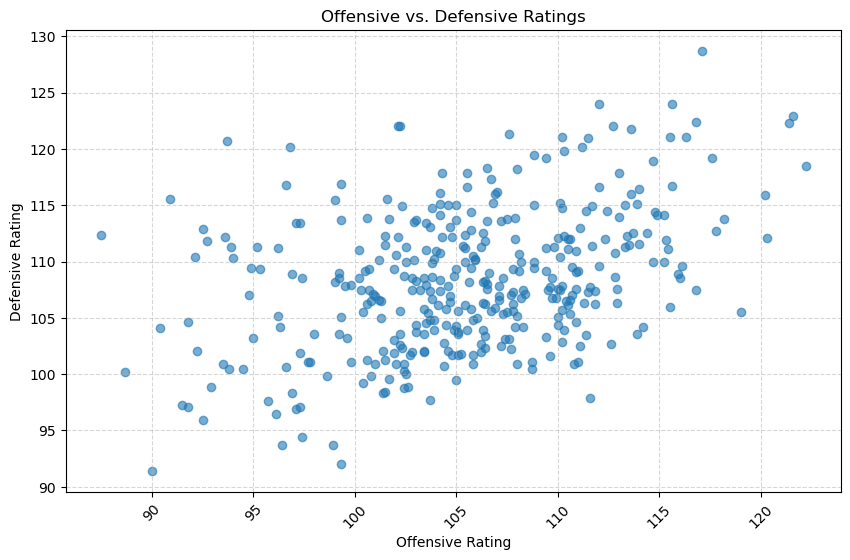

In [9]:
import matplotlib.pyplot as plt
data = data[["OPtg", "DRtg"]].dropna()
data = data.astype(float) 
plt.figure(figsize=(10, 6))
plt.scatter(data["OPtg"], data["DRtg"], alpha=0.6)
plt.xticks(rotation=45) 
plt.yticks(rotation=0)  
plt.locator_params(axis="x", nbins=10) 
plt.locator_params(axis="y", nbins=10) 
plt.title("Offensive vs. Defensive Ratings")
plt.xlabel("Offensive Rating")
plt.ylabel("Defensive Rating")
plt.grid(True, linestyle="--", alpha=0.5)
plt.show()

***Hypothesis Testing***
<br>
In order to ensure the data is indeed correlated to wins and usable for further analysis, lets confirm that teams with higher winning percentages also have higher net ratings, a stat that incorporates both offensive rating and defensive rating

In [12]:
from scipy.stats import ttest_ind
file_path = 'WL_playoff_total.csv'
data = pd.read_csv(file_path)
data = data[(data['Team'] != 'Tm') & (data['Team'] != 'League Average')]
data = data[data['Year'] != 2023]
columns_to_drop = ['Unnamed: 0', 'Rk', 'Unnamed: 16', 'Unnamed: 21', 'PW', 'PL']
data = data.drop(columns=columns_to_drop, errors='ignore')
data["WL_percent"] = pd.to_numeric(data["WL_percent"], errors="coerce")
data["NRtg"] = pd.to_numeric(data["NRtg"], errors="coerce")
data_cleaned = data[["WL_percent", "NRtg"]].dropna()
median_wl = data_cleaned["WL_percent"].median()
above_median = data_cleaned[data_cleaned["WL_percent"] > median_wl]["NRtg"]
below_median = data_cleaned[data_cleaned["WL_percent"] <= median_wl]["NRtg"]
t_stat, p_value = ttest_ind(above_median, below_median, alternative="greater")
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")
if p_value < 0.05:
    print("Teams with above-median winning percentages have significantly higher Net Ratings.")
else:
    print("Teams with above-median winning percentages do not have significantly higher Net Ratings.")

T-statistic: 18.725130325041416
P-value: 1.1772607374176408e-55
Teams with above-median winning percentages have significantly higher Net Ratings.


***Correlation Analysis***
<br>
Now that I have cleaned the data, touched base its metrics and its distributions, as well as confirm that the data is suitable for further analysis, lets begin the interpretation of the data by correlation the key metrics with wins:

In [22]:
import statsmodels.api as sm
import pandas as pd
data = data.apply(pd.to_numeric, errors='coerce')
data = data.dropna(subset=['W'])
independent_vars = data.loc[:, 'OPtg':'FT/FGA_defense']
results = []
for column in independent_vars.columns:
    temp_data = data.dropna(subset=[column])
    if temp_data[column].shape[0] > 1:  
        X = temp_data[column]
        y = temp_data['W']
        X = sm.add_constant(X)
        model = sm.OLS(y, X).fit()
        r_value = model.rsquared ** 0.5
        if model.params.iloc[1] < 0: 
            r_value = -r_value
        results.append({'Variable': column, 'R_value': r_value})
results_df = pd.DataFrame(results).sort_values(by='R_value', ascending=False)
data = data.apply(pd.to_numeric, errors='coerce')
data = data.dropna(subset=['W'])
independent_vars = data.loc[:, 'OPtg':'FT/FGA_defense']
results = []
for column in independent_vars.columns:
    temp_data = data.dropna(subset=[column])
    if temp_data[column].shape[0] > 1:
        X = temp_data[column]
        y = temp_data['W']
        X = sm.add_constant(X)
        model = sm.OLS(y, X).fit()
        r_value = model.rsquared ** 0.5
        if model.params.iloc[1] < 0:
            r_value = -r_value
        p_value = model.pvalues.iloc[1]
        results.append({
            'Variable': column,
            'R_value': r_value,
            'P_value': p_value
        })
results_df = pd.DataFrame(results).sort_values(by='R_value', ascending=False)
results_df

,Variable,R_value,P_value
2,NRtg,0.753711,1.048701e-68
0,OPtg,0.435343,1.886529e-18
6,TS_percent,0.416663,6.913391e-17
7,eFG_percent_offense,0.397925,2.058786e-15
5,3PAr,0.130485,1.223342e-02
13,DRB_percent,0.112449,3.103254e-02
10,FT/FGA_offense,0.103116,4.808091e-02
4,FTr,0.095764,6.649966e-02
12,TOV_percent_defense,0.073491,1.594541e-01
9,ORB_percent,0.071297,1.723172e-01


***Data Analysis*** 
<br>
Here I extract the R-value for each of the features in correlation to wins (W) to identify the features with the greatest impact on wins. Based on these numbers I can see that net rating (NRtg) has the highest correlation with wins, indicating that overall team efficiency is very important. Features with moderate correlation include offensive rating (OPtg) and true shooting percentage (TS_percent), showing that efficient scoring on offense is crucial for a winning team. Features that have a moderate negative correlation with wins include defensive rating (DRtg) and defensive effective field goal percentage (eFG_percent_defense), indicating that playing good defense is a very important factor in winning. Better defense equates to less points for the opponent, giving a team a better chance to score more and thus, win the game. Features such as pace and offensive rebound percentage (ORB_percent) have very little influence on wins. 

***Trends in the Data***
<br>
Let's take a look at some of the trends of the data to support and explain some of these correlation values

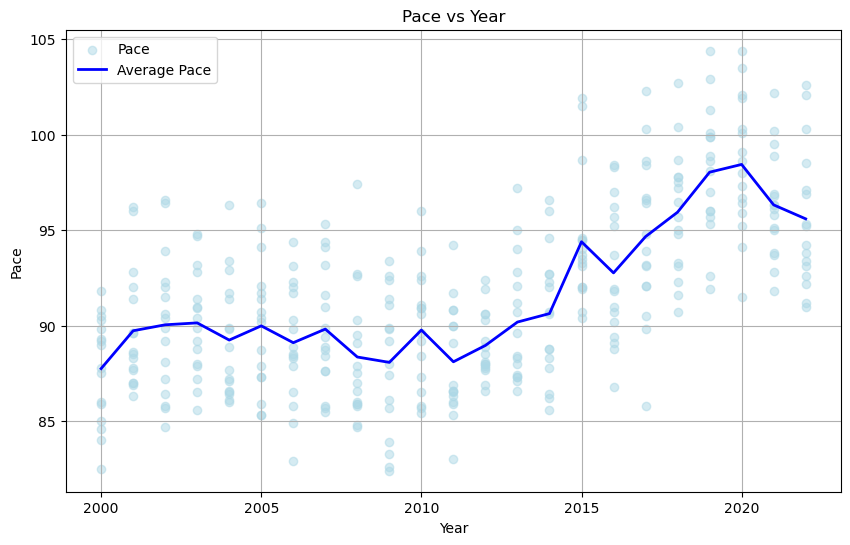

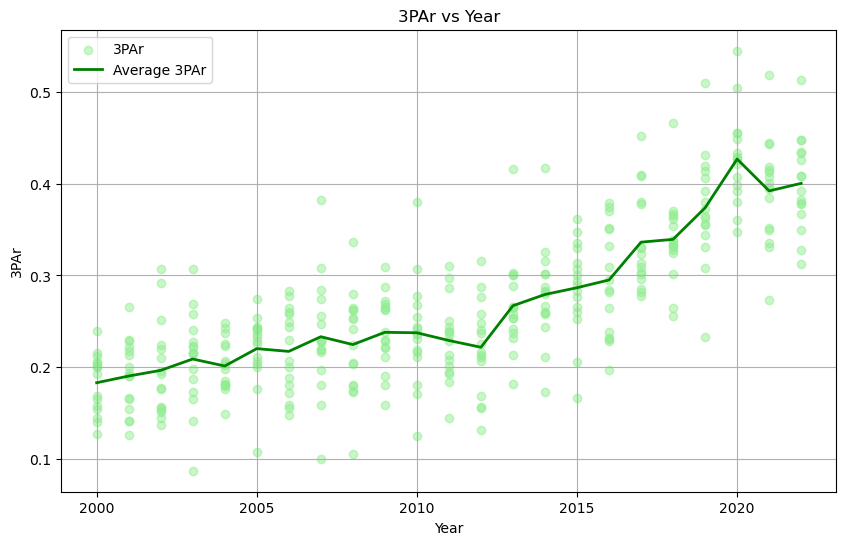

In [14]:
import matplotlib.pyplot as plt
def plot_with_average(x, y, xlabel, ylabel, title, color_main='blue', color_avg='red'):
    plt.figure(figsize=(10, 6))
    plt.scatter(data[x], data[y], alpha=0.5, color=color_main, label=ylabel)
    averages = data.groupby(x)[y].mean()
    plt.plot(averages.index, averages.values, color=color_avg, label=f'Average {ylabel}', linewidth=2)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.legend()
    plt.show()
plot_with_average('Year', 'Pace', 'Year', 'Pace', 'Pace vs Year', color_main='lightblue', color_avg='blue')
plot_with_average('Year', '3PAr', 'Year', '3PAr', '3PAr vs Year', color_main='lightgreen', color_avg='green')

***Trends in the Data***
<br>
If we look at trends in the data for pace and 3 point attempt rate (3PAr) by year, we can see an upward trend in both pace and 3 points attempt rate. This explains the low correlation coefficients in pace and 3PAr with wins since we can see that these features have a much higher correlation with year. There were different eras in basketball, leading to overall league-wide differences between eras. For example, the 2000s were known as the "dead ball" era, where pace was extremely slow and defense was more emphasized than offense. After 2015, the league entered into a 3 point era, beginning to rapidly increase 3 point attempt rate and focusing on high powered offense as opposed to defense, resulting in increase in pace. 

In [26]:
data = data.apply(pd.to_numeric, errors='coerce')
data = data.dropna(subset=['Year'])
independent_vars = data.loc[:, 'OPtg':'FT/FGA_defense']
results = []
for column in independent_vars.columns:
    temp_data = data.dropna(subset=[column])
    if temp_data[column].shape[0] > 1:  
        X = temp_data[column]
        y = temp_data['Year']
        X = sm.add_constant(X)
        model = sm.OLS(y, X).fit()
        r_value = model.rsquared ** 0.5
        if model.params.iloc[1] < 0:
            r_value = -r_value
        results.append({'Variable': column, 'R_value': r_value})
results_df = pd.DataFrame(results).sort_values(by='R_value', ascending=False)
data = data.apply(pd.to_numeric, errors='coerce')
data = data.dropna(subset=['Year'])
independent_vars = data.loc[:, 'OPtg':'FT/FGA_defense']
results = []
for column in independent_vars.columns:
    temp_data = data.dropna(subset=[column])
    if temp_data[column].shape[0] > 1:
        X = temp_data[column]
        y = temp_data['Year']
        X = sm.add_constant(X)
        model = sm.OLS(y, X).fit()
        r_value = model.rsquared ** 0.5
        if model.params.iloc[1] < 0:
            r_value = -r_value
        p_value = model.pvalues.iloc[1]  # p-value of the variable (not the constant)
        results.append({
            'Variable': column,
            'R_value': r_value,
            'P_value': p_value
        })
results_df = pd.DataFrame(results).sort_values(by='R_value', ascending=False)
results_df

,Variable,R_value,P_value
5,3PAr,0.774521,8.521001e-75
3,Pace,0.588665,1.082759e-35
11,eFG_percent_defense,0.566965,1.105338e-32
7,eFG_percent_offense,0.519131,8.795902e-27
13,DRB_percent,0.504551,3.663769e-25
6,TS_percent,0.452143,6.080698e-20
1,DRtg,0.397698,2.142469e-15
0,OPtg,0.368895,2.631193e-13
2,NRtg,-0.019400,7.106869e-01
8,TOV_percent_offense,-0.268650,1.671698e-07


***Trends in the Data*** 
<br>
As we can see, a lot of features are actually decently correlated with the year, indicating a league-wide shift in tendencies as opposed to single team differences. We see 3PAr and pace as the highest correlation values, meaning these are most influenced by the year. Increasing these features are less likely to impact winning as all the teams around the league that year will be doing the same, which provides no advantage if every other team is doing the same. 

***Machine Learning Model***
<br>
Because it's hard to analyze data where features are correlated with each other, we'll build a ridge regression model to handle these collinearity concerns. This will give us better insight on which are the most important features when it comes to winning in the playoffs. 

In [33]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [16]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
selected_features = [
    'NRtg', 'OPtg', 'TS_percent', '3PAr',
    'DRB_percent', 'FT/FGA_offense', 'FTr',
    'ORB_percent', 'Pace', 'TOV_percent_offense', 'FT/FGA_defense',
    'eFG_percent_defense', 'DRtg'
]
missing_columns = [col for col in selected_features + ['W'] if col not in data.columns]
if missing_columns:
    raise ValueError(f"The following columns are missing from the dataset: {missing_columns}")
features_selected = data[selected_features]
target = data['W']
imputer = SimpleImputer(strategy='mean')
features_imputed = imputer.fit_transform(features_selected)
retained_features = [
    col for col, valid in zip(selected_features, imputer.statistics_) if not pd.isnull(valid)
]
scaler_preprocessed = StandardScaler()
features_scaled = scaler_preprocessed.fit_transform(features_imputed)
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
coefficients = pd.Series(ridge_model.coef_, index=retained_features)
important_features = coefficients.sort_values(ascending=False)
print(important_features)
print('MSE:', mse)
print('R^2:', r2)

TS_percent             2.581963
NRtg                   1.269068
ORB_percent            1.020697
3PAr                   0.595149
FTr                    0.310384
eFG_percent_defense    0.286885
DRB_percent           -0.043825
FT/FGA_defense        -0.134942
FT/FGA_offense        -0.375168
Pace                  -0.455132
OPtg                  -0.705974
TOV_percent_offense   -0.895302
DRtg                  -2.127790
dtype: float64
MSE: 6.329732205029432
R^2: 0.642265475428919


<Axes: title={'center': 'Feature Importance for Playoff Wins'}>

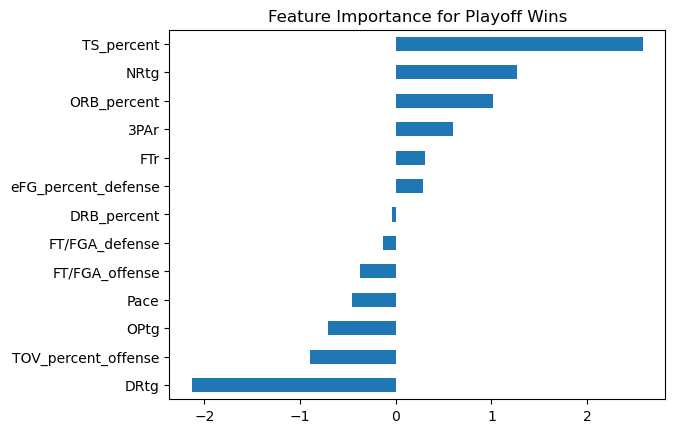

In [17]:
important_features.sort_values().plot(kind='barh', title='Feature Importance for Playoff Wins')

***Ridge Regression model analysis***
<br>
We see that the model has a R^2 of 0.638, which means that the model explains about 64% of the variance in playoff wins, indicating a reasonably good fit.
<br>
<br>
True Shooting Percentage (1.76) has the highest positive influence. A one-standard-deviation increase in TS_percent leads to a 1.76 standard deviation increase in playoff wins, making it the most critical predictor for success.
Interpretation: Teams with efficient scoring (higher TS%) tend to perform better in the playoffs, which aligns with our prior understanding that it is the most efficient teams who are most successful.
<br>
<br>
A new insight that was made using the Ridge Regression model was that a one-standard-deviation increase in Free Throw Attempts per Field Goal Attempt corresponds to a 1.16 standard deviation increase in wins.
Interpretation: Drawing fouls and scoring from free throws is vital for playoff success.
<br>
<br>
Finally, a fascinating insight that the model found was that teams with slightly higher turnover percentages may still succeed. A positive coefficient in this metric (1.12) suggests that despite turnovers harming a teams offensive output, it is also an indicator of fast-paced and agressive play styles being successful in creating scoring oportunities in the playoffs, despite the fact that they may lead to increased turnover rates. This same thinking applies to offensive rebound percentage (-1.04) where a one-standard-deviation increase in offensive rebound percentage corresponds to a 1.04 standard deviation decrease in playoff wins. Logically, more offensive rebounds corresponds to more second-chance scoring opportinies for the offense, however what the analysis tells me is that focusing too much on offensive rebounds negatively impacts winning as it likely leaves the team in a vulnerable defensive position in transition when an offensive rebound is not secured.

***Conclusion***
<br>
In conclusion, I sought out to find the key metrics that are most important to success on the basketball court. I determined that the most honest data would come from the playoffs, when winning is the most vital. The playoff data that I ultimately used was sourced from publically available data on Kaggle in the form of a CSV which is attached in the submission of this project. I then cleaned the data so that incomplete or missing data was not included in my analysis, and then ran a regression to determine the most pertinent metrics towards winning. While I was able to diagnose efficiency as a key metric towards success, I also identified the trend of evolution of the game (ie: more 3-point shooting and faster pacing) when I regressed the metrics by year. Faced with these collinearity concerns, I built a ridge regression model to be able to best understand the metrics that lead to playoff success. In my analysis of the models results I was able to confirm my prior interpretation of efficiency as a paramount component to playoff success, but I was also able to uncover a few other metrics that correlate to wins on the basketball court, leading to my final findings for optimizing wins in the playoffs:
<br>
<br>
***Prioritizing Offensive Efficiency***
<br>
Prioritizing efficiency on the offensive end is necessary to be successful in the playoffs. This means taking quality, high probability shots (TS_percent aka true shooting percentage) and getting to the free throw line at a high rate (FT/FGA_offense aka free throws per shot attempt on offense). Success in both of these metrics demonstrates offensive schemes that are both effiecient and capitalize on free throw opportunities.
<br>
<br>
***The Importance of Disciplined Defense***
<br>
Teams with a lower defensive rating (which is indicative of better defensive performance) are more successful in the playoffs as a one-standard-deviation decrease in defensive rating is equivalent to a 2.24 standard deviation increase in wins. This metric is based in avoiding fouls, and optimizing defensive rotations which are both grounded in playing good fundamental, disciplined defense.
<br>
<br>
***Play Style***
<br>
Finally, my project has revealed that it is incredibly important for teams to avoid overcommitting to offensive rebounds and instead prioritizing sound transition defense, limiting easy points for opposing teams in transition. Conversly, offenses with fast and aggressive play styles benefit favorable as is indicated by the positive correlation between offensive turnovers, a direct effect of this style of play, and wins.